# Exploratory Data Analysis
We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each file:
Most common words - find these and create word clouds


## Most common words

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm_to.pkl')
data = data.transpose()
data.head()

,AJC1.xml,AJC2.xml,AVW1.xml,AVW2.xml,BDO1.xml,BDO2.xml,CDH1.xml,CMC1.xml,CMC2.xml,ECB1.xml,...,OMS1.xml,OMS2.xml,RMB1.xml,RMB2.xml,SAU1.xml,SAU2.xml,SC1.xml,SC2.xml,WJAW1.xml,WJAW2.xml
able,0,1,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
abracadabra,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
accident,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ache,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,2,0,0,0,0
aches,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Find the top 30 words said by each file
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'AJC1.xml': [('yeah', 125),
  ('oh', 70),
  ('okay', 65),
  ('like', 41),
  ('thats', 40),
  ('ooh', 36),
  ('got', 35),
  ('did', 26),
  ('whats', 26),
  ('look', 24),
  ('think', 23),
  ('dont', 22),
  ('wanna', 21),
  ('im', 21),
  ('come', 21),
  ('know', 20),
  ('theres', 20),
  ('um', 19),
  ('does', 19),
  ('lets', 19),
  ('umm', 17),
  ('rubbish', 17),
  ('mom', 16),
  ('knock', 16),
  ('yes', 16),
  ('wow', 16),
  ('hm', 15),
  ('play', 15),
  ('going', 14),
  ('daniel', 14)],
 'AJC2.xml': [('yeah', 127),
  ('oh', 61),
  ('like', 49),
  ('okay', 33),
  ('wanna', 33),
  ('look', 31),
  ('wow', 28),
  ('think', 27),
  ('mom', 27),
  ('ooh', 26),
  ('got', 26),
  ('dont', 23),
  ('car', 21),
  ('come', 21),
  ('did', 20),
  ('um', 20),
  ('thats', 18),
  ('hafta', 18),
  ('does', 18),
  ('play', 17),
  ('lets', 16),
  ('im', 16),
  ('youre', 15),
  ('drink', 15),
  ('going', 15),
  ('good', 15),
  ('hes', 15),
  ('way', 14),
  ('monkey', 14),
  ('apple', 14)],
 'AVW1.xml': [('oh

In [3]:
# Print the top 15 words said by each file
for file, top_words in top_dict.items():
    print(file)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

AJC1.xml
yeah, oh, okay, like, thats, ooh, got, did, whats, look, think, dont, wanna, im
---
AJC2.xml
yeah, oh, like, okay, wanna, look, wow, think, mom, ooh, got, dont, car, come
---
AVW1.xml
oh, did, got, okay, plate, im, going, pretend, cream, ice, bit, yeah, look, erm
---
AVW2.xml
la, oh, okay, dog, got, going, yeah, im, did, xxx, thing, think, giddy, having
---
BDO1.xml
look, dont, whats, yeah, thats, like, oh, xxx, mum, helicopter, going, grapes, cheese, engine
---
BDO2.xml
yeah, xxx, mum, going, oh, trot, eat, tree, shes, dont, theyre, hes, needs, cake
---
CDH1.xml
dont, thats, want, going, oh, yeah, like, come, okay, look, eat, hello, little, got
---
CMC1.xml
yeah, house, thats, whats, oh, um, wheres, gone, got, belly, did, theres, lets, ache
---
CMC2.xml
yeah, oh, plate, xxx, like, wheres, thats, cake, dont, daddy, tea, cup, look, whats
---
ECB1.xml
oh, yeah, look, like, whats, thats, theres, yes, xxx, did, think, eat, erm, going
---
ECB2.xml
oh, thats, whats, yeah, okay, look

We can still see some meaningless words, even though we can create word cloud from this.
So we should further remove more stop words.

In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each file
words = []
for file in data.columns:
    top = [word for (word, count) in top_dict[file]]
    for t in top:
        words.append(t)
        
words

['yeah',
 'oh',
 'okay',
 'like',
 'thats',
 'ooh',
 'got',
 'did',
 'whats',
 'look',
 'think',
 'dont',
 'wanna',
 'im',
 'come',
 'know',
 'theres',
 'um',
 'does',
 'lets',
 'umm',
 'rubbish',
 'mom',
 'knock',
 'yes',
 'wow',
 'hm',
 'play',
 'going',
 'daniel',
 'yeah',
 'oh',
 'like',
 'okay',
 'wanna',
 'look',
 'wow',
 'think',
 'mom',
 'ooh',
 'got',
 'dont',
 'car',
 'come',
 'did',
 'um',
 'thats',
 'hafta',
 'does',
 'play',
 'lets',
 'im',
 'youre',
 'drink',
 'going',
 'good',
 'hes',
 'way',
 'monkey',
 'apple',
 'oh',
 'did',
 'got',
 'okay',
 'plate',
 'im',
 'going',
 'pretend',
 'cream',
 'ice',
 'bit',
 'yeah',
 'look',
 'erm',
 'think',
 'like',
 'grapes',
 'thats',
 'suki',
 'big',
 'ive',
 'bed',
 'having',
 'toilet',
 'shes',
 'whats',
 'hot',
 'remember',
 'drink',
 'tea',
 'la',
 'oh',
 'okay',
 'dog',
 'got',
 'going',
 'yeah',
 'im',
 'did',
 'xxx',
 'thing',
 'think',
 'giddy',
 'having',
 'yesterday',
 'grapes',
 'angel',
 'lets',
 'princess',
 'yes',
 'b

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('yeah', 42),
 ('thats', 41),
 ('look', 41),
 ('oh', 40),
 ('like', 40),
 ('got', 40),
 ('dont', 37),
 ('xxx', 37),
 ('going', 34),
 ('whats', 32),
 ('think', 28),
 ('okay', 27),
 ('yes', 27),
 ('theres', 26),
 ('know', 25),
 ('did', 24),
 ('im', 20),
 ('big', 20),
 ('play', 18),
 ('want', 18),
 ('wanna', 17),
 ('come', 17),
 ('does', 17),
 ('house', 17),
 ('erm', 16),
 ('little', 15),
 ('tea', 14),
 ('lets', 13),
 ('eat', 13),
 ('mummy', 12),
 ('shall', 12),
 ('hes', 11),
 ('just', 11),
 ('good', 10),
 ('right', 10),
 ('ice', 9),
 ('mm', 9),
 ('cat', 9),
 ('wheres', 9),
 ('cream', 8),
 ('bit', 8),
 ('bed', 8),
 ('make', 8),
 ('isnt', 8),
 ('need', 8),
 ('plate', 7),
 ('mum', 7),
 ('juice', 7),
 ('cake', 7),
 ('thankyou', 7),
 ('car', 6),
 ('youre', 6),
 ('theyre', 6),
 ('gonna', 6),
 ('round', 6),
 ('hafta', 5),
 ('grapes', 5),
 ('helicopter', 5),
 ('doing', 5),
 ('hello', 5),
 ('goes', 5),
 ('didnt', 5),
 ('rabbit', 5),
 ('um', 4),
 ('mom', 4),
 ('drink', 4),
 ('ive', 4),
 ('dog', 4

In [6]:
# If more than half of the files have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 17]
add_stop_words

['yeah',
 'thats',
 'look',
 'oh',
 'like',
 'got',
 'dont',
 'xxx',
 'going',
 'whats',
 'think',
 'okay',
 'yes',
 'theres',
 'know',
 'did',
 'im',
 'big',
 'play',
 'want']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean_to.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop_to.pkl", "wb"))
data_stop.to_pickle("dtm_stop_to.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

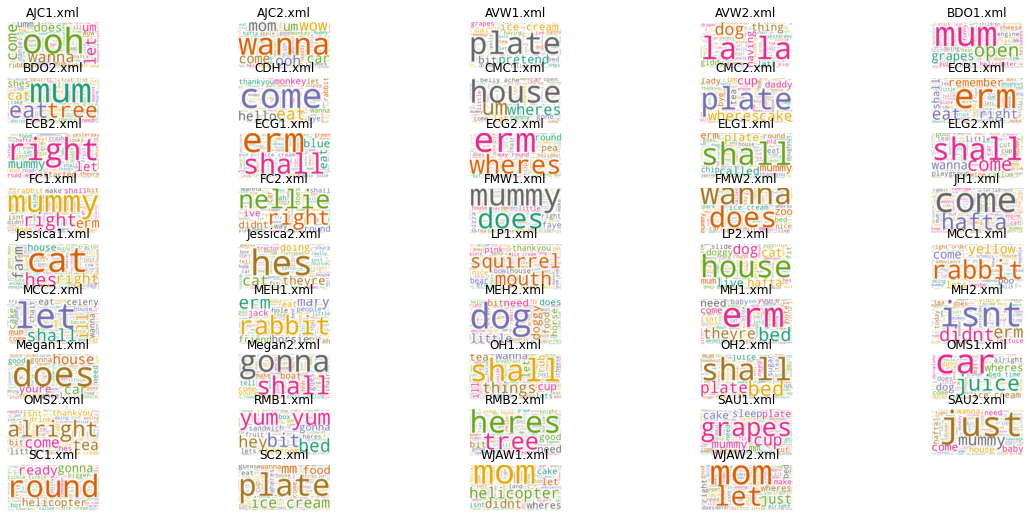

In [18]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]


# Create subplots for each file
for index, file in enumerate(data.columns):
    wc.generate(data_clean.transcript[file])
    
    plt.subplot(10, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(file)
    
plt.show()

## Finding
still some meaningless words, need to improve

## EDA goal
Our EDA goal is to take a first look if our basic analysis make sense.
Still need to improve of course, but it's good enough to go further with this!

"data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything."

ref: [https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/2-Exploratory-Data-Analysis.ipynb]